In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap,LocallyLinearEmbedding
from sklearn.cluster import KMeans
from skimage.transform import resize

In [146]:
image_path = '../../data/imgs/0618.png'
image = cv2.imread(image_path)
if image is None:
    print("image read error")
else:
    # 将BGR转换为RGB
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_LAB = cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

In [147]:
# 使用LLE降维（从3维到2维）
lle = LocallyLinearEmbedding(n_neighbors=75, n_components=2, method='standard')
original_shape = image.shape
# RGB
image_resized_RGB = resize(image_RGB, (image_RGB.shape[0] // 2, image_RGB.shape[1] // 2), anti_aliasing=True)
image_flat_lle_RGB = image_resized_RGB.reshape(-1, 3)
image_reduced_lle_RGB = lle.fit_transform(image_flat_lle_RGB)
# LAB
image_resized_LAB = resize(image_LAB, (image_LAB.shape[0] // 2, image_LAB.shape[1] // 2), anti_aliasing=True)
image_flat_lle_LAB = image_resized_LAB.reshape(-1, 3)
image_reduced_lle_LAB = lle.fit_transform(image_flat_lle_LAB)
# HSV
image_resized_HSV = resize(image_HSV, (image_HSV.shape[0] // 2, image_HSV.shape[1] // 2), anti_aliasing=True)
image_flat_lle_HSV = image_resized_HSV.reshape(-1, 3)
image_reduced_lle_HSV = lle.fit_transform(image_flat_lle_HSV)

In [148]:
# k-means cluster
n_clusters = 2  # 设置分区数量


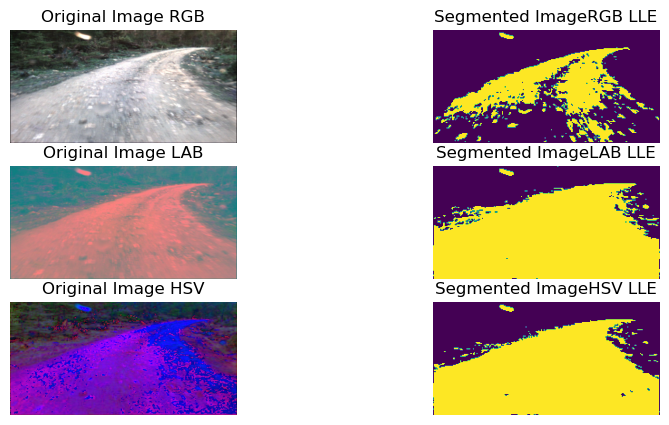

In [149]:

# RGB
kmeans_RGB = KMeans(n_clusters=n_clusters, random_state=42)
labels_RGB = kmeans_RGB.fit_predict(image_reduced_lle_RGB)
segmented_image_RGB = labels_RGB.reshape(image_resized_RGB.shape[0], image_resized_RGB.shape[1])

# LAB
kmeans_LAB = KMeans(n_clusters=n_clusters, random_state=42)
labels_LAB = kmeans_LAB.fit_predict(image_reduced_lle_LAB)
segmented_image_LAB = labels_LAB.reshape(image_resized_LAB.shape[0], image_resized_LAB.shape[1])

# HSV
kmeans_HSV = KMeans(n_clusters=n_clusters, random_state=42)
labels_HSV = kmeans_HSV.fit_predict(image_reduced_lle_HSV)
segmented_image_HSV = labels_HSV.reshape(image_resized_HSV.shape[0], image_resized_HSV.shape[1])

# 可视化分割后的图像
plt.figure(figsize=(10, 5))

plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title("Original Image RGB")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(segmented_image_RGB, cmap='viridis')
plt.title("Segmented ImageRGB LLE")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(image_LAB)
plt.title("Original Image LAB")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(segmented_image_LAB, cmap='viridis')
plt.title("Segmented ImageLAB LLE")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(image_HSV)
plt.title("Original Image HSV")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.imshow(segmented_image_HSV, cmap='viridis')
plt.title("Segmented ImageHSV LLE")
plt.axis("off")

plt.show()

In [150]:
# 使用Isomap降维（从RGB 3维到2维）
original_shape = image.shape
isomap = Isomap(n_neighbors=5, n_components=2)  # 5邻居，降到2维
# RGB
image_resized_RGB = resize(image_RGB, (image_RGB.shape[0] // 4, image_RGB.shape[1] // 4), anti_aliasing=True)
image_flat_isomap_RGB = image_resized_RGB.reshape(-1, 3)
image_reduced_isomap_RGB = isomap.fit_transform(image_flat_isomap_RGB)
# LAB
image_resized_LAB = resize(image_LAB, (image_LAB.shape[0] // 4, image_LAB.shape[1] // 4), anti_aliasing=True)
image_flat_isomap_LAB = image_resized_LAB.reshape(-1, 3)
image_reduced_isomap_LAB = isomap.fit_transform(image_flat_isomap_LAB)
# HSV
image_resized_HSV = resize(image_HSV, (image_HSV.shape[0] // 4, image_HSV.shape[1] // 4), anti_aliasing=True)
image_flat_isomap_HSV = image_resized_HSV.reshape(-1, 3)
image_reduced_isomap_HSV = isomap.fit_transform(image_flat_isomap_HSV)


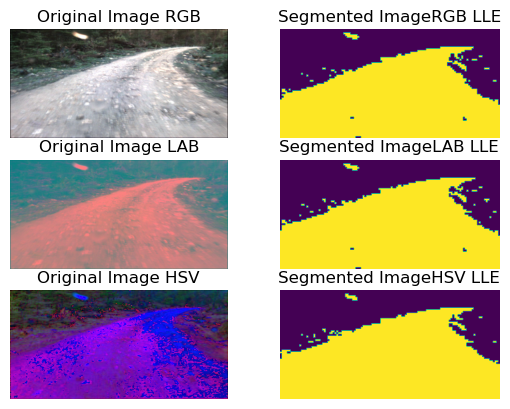

In [ ]:
# RGB
kmeans_RGB = KMeans(n_clusters=n_clusters, random_state=42)
labels_RGB = kmeans_RGB.fit_predict(image_reduced_isomap_RGB)
segmented_image_RGB = labels_RGB.reshape(image_resized_RGB.shape[0], image_resized_RGB.shape[1])

# LAB
kmeans_LAB = KMeans(n_clusters=n_clusters, random_state=42)
labels_LAB = kmeans_LAB.fit_predict(image_reduced_isomap_LAB)
segmented_image_LAB = labels_LAB.reshape(image_resized_LAB.shape[0], image_resized_LAB.shape[1])

# HSV
kmeans_HSV = KMeans(n_clusters=n_clusters, random_state=42)
labels_HSV = kmeans_HSV.fit_predict(image_reduced_isomap_HSV)
segmented_image_HSV = labels_HSV.reshape(image_resized_HSV.shape[0], image_resized_HSV.shape[1])

# 可视化分割后的图像
plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title("Original Image RGB")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(segmented_image_RGB, cmap='viridis')
plt.title("Segmented ImageRGB isomap")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(image_LAB)
plt.title("Original Image LAB")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(segmented_image_LAB, cmap='viridis')
plt.title("Segmented ImageLAB isomap")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(image_HSV)
plt.title("Original Image HSV")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.imshow(segmented_image_HSV, cmap='viridis')
plt.title("Segmented ImageHSV isomap")
plt.axis("off")

plt.show()